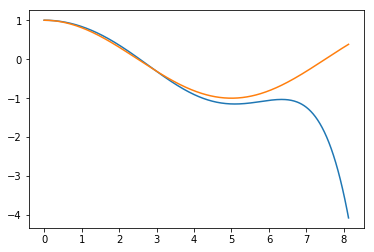

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt

from ballbeam import PID, BallBeam

%matplotlib inline

pid = PID(kp = 0.6, ki = 0.05, kd = 0.001)
bb = BallBeam(r = 1, theta = 0.0564, a = 1)

x = []
y1 = []
y2 = []

while True:
    pid.set_point = bb.yd()
    bb.feed(pid.output)
    pid.compute(bb.output)
    
    x.append(time.time() - bb.start_ts)
    y1.append(bb.output)
    y2.append(bb.yd())
    
    time.sleep(0.02)
    
    if abs(bb.output) > 4:
        break
        
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()